In [19]:
from io import BytesIO

from IPython.core import display
from PIL import Image

# Installed apps
from PyPDF2 import PdfFileReader
from sorl.thumbnail import ImageField
from wand.image import Image as WandImage
from wand.color import Color
import os.path
# Project apps

def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()


# register display func with PNG formatter:
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)

In [63]:
from IPython.display import Image

def create_thumbnail(self):
    """ Create a jpg version of the pdf frontpage """
    pdf_name = self.pdf.path
    cover_page = pdf_name.replace(
        '.pdf', '.jpg').replace(
        'pdf/', 'pdf/covers/')
    img = WandImage(filename=pdf_name + '[0]', resolution=60)
    bg = WandImage(
        width=img.width,
        height=img.height,
        background=Color('white'))
    bg.composite(img, 0, 0)
    bg.save(filename=cover_page)
    self.cover_page = cover_page
    self.save()
    
def show_thumbnail(self):
    cover_page = '/tmp/wand_img.png'
    pdf_name = self.pdf.path
    img = WandImage(filename=pdf_name + '[0]', resolution=20)
    bg = WandImage(
        width=img.width,
        height=img.height,
        background=Color('white'))
    bg.composite(img, 0, 0)
    bg.save(filename=cover_page)
    return bg

    #return Image(filename=cover_page)

    
goodimg = show_thumbnail(PrintIssue.objects.first())
badimg = show_thumbnail(PrintIssue.objects.last())

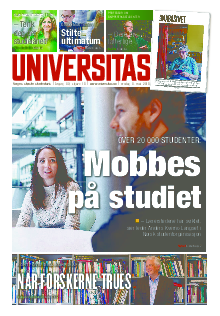

In [64]:
from ctypes import c_void_p, c_int
from wand.api import library
library.MagickTransformImageColorspace.argtypes = [c_void_p, c_int]

library.MagickTransformImageColorspace(badimg.wand, 6)
badimg

In [55]:
goodimg.type, badimg.type

('truecolor', 'truecolor')

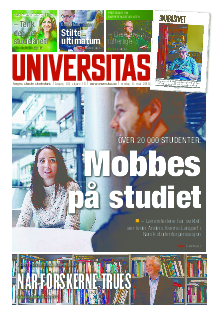

In [45]:
badimg